# O caixeiro com gasolina infinita
### (e sem consciência)

**Experimento da Lista de experimentos disponibilizada no github**

## Introdução

Para esse experimento dado como desafio, vemos `o caixeiro viajante`, resolvido anteriormente no experimento A.06, porém agora ele agora vai segui pelo maior caminho possível entre as cidades que ele passará. 

Nesse sentido, agora é necessário que seja encontrada a maior distância entre que o caixeiro deve percorrer para passar dentre todas as cidades para que ele retorne ao seu ponto incial, ou cidade de partida.

Daí que vem o nome do problema. Esse caixeiro realmente não é nem um pouco consciente de suas ações e o que elas podem causar ao meio ambiente!!!

## Objetivo: 

Encontrar o caminho de *maior* distância no problema do caixeiro viajante e mostrar ele de forma gráfica. Serão consideradas 5 cidades e nenhuma delas pode ser visitada novamente.

**Considerações a se fazer:** Considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.

### Importações

<font color=lightseagreen> Para este experimento, foi preciso modificar apenas uma função, a função de `selecao_torneio_min`, que foi copiada para uma nova função de `selecao_torneio_maximo`, de forma que a primeira não fosse alterada. A nova função deve realizar um torneio entra os indíviduos em que aquele com o máximo valor de fitness ganhe, portanto ela é uma função de maximização. O código usado foi retirado e baseado no experimento `A.06 - o caixeiro viajante`. </font>

<font color=lightseagreen> Desta maneira, as importações de módulos e funções que vamos precisar se encontram a seguir. </font>

In [1]:
import random
from itertools import permutations

from funcoes import cria_cidades
from funcoes import populacao_inicial_cv as cria_pop_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import selecao_torneio_max as funcao_selecao
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

### Códigos e Discussão

<font color=lightseagreen> O primeiro passo para chegarmos ao nosso objetivo (depois de realizar as importações) é indicar com quantas cidades estamos trabalhando, no caso cinco, e criar uma lista com eles como mostrado de maneira simples na célula de código abaixo. Além disso, usando o método `shuffle` da biblioteca random, vemos como reordenar os itens da nossa lista criada de maneira aleatória. </font>

In [2]:
cidades = cria_cidades(5) # indicando o número de cidades

cidades

nomes = list(cidades.keys()) # criando uma lista para essas 5 cidades
nomes
random.shuffle(nomes) # reorganizando a ordem dos itens
nomes

['Cidade 0', 'Cidade 4', 'Cidade 1', 'Cidade 2', 'Cidade 3']

<font color=lightseagreen> Compreendido isso, precisamos definir todas as nossas constantes, incluindo o número de cidades, pois da forma que foi colocada anteriormente torna complicada a sua implementação dentro do nosso algoritmo. Sendo assim, separam-se as contantes de busca e aquelas que são relacionadas únicamente ao problema (o número de ciades, no caso). </font>

In [3]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 3000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUM_CIDADES = 5
CIDADES = cria_cidades(NUM_CIDADES)

<font color=lightseagreen> Implementa-se novas funções locais que dizem respeito à população e ao indivíduo, de forma a modificar o argumento `cidades` das funções objetivas no script para o nome `CIDADES`, que substitui para a função `cria cidades`, que recebe o argumento do número de cidades definido anteriormente. </font>

In [4]:
# Funções locais

def func_obj_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def func_obj_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

<h4><font color=lightseagreen> Vamos agora ao nosso algoritmo de busca </font></h4>

<font color=lightseagreen> Começamos por nomear a função que cria a população inicial com um nome mais simples e substituindo os argumantos dela pelas constantes estabelecidas, `TAMANHO_POP` e `CIDADES`. Importante ressaltar que, definindo o valor de `melhor_fitness_ja_visto` como infinito, estamos designando um valor indeterminado que pode ser positivo ou negativo, não sendo igual a zero, a partir da função `float()`. </font>

<font color=lightseagreen> Com isso, inciamos o `loop` de gerações as quais sofrem a seleção dada pela função de máximização difinida em `funcoes.py`, que é responsável por escolher a melhor população a partir do `fitness` de cada uma, o cruzamento, que trabalha a parte de mistura de genes de um indivíduo <i>pai</i> e outro individuo <i>mãe</i> e a mutação que serve para melhorar os genes dos indivíduos. Assim pode ser encontrada a maior distância possível a ser percorrida pelo caixeiro. </font>

<font color=lightseagreen> Por último, pracisamos de uma maneira de obter o melhor resultado possível para uma maior distância existente. Através do fitness é possível conseguir esse resultado, que para o que queremos no experimento é o maior fitness, determinado por `max(fitness)`. Portanto, por uma condição `if`, o algoritmo deve identificar um `maior_fitness` sendo maior que o `melhor_fitness_ja_visto` e transformar esse novo fitness encontrado no melhor já visto. Juntamente, o maior fitness dado pela função objetiva deveria ser retornado com o indivíduo dado por `posição`. </font>

In [5]:
# Busca por algoritmo genético

# nomeando a população inicial
populacao = cria_pop_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")  # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção (maximização)
    fitness = func_obj_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = func_obj_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness  

<font color=lightseagreen> Podemos realizar a mesma busca feita pelo algoritmo, porém por método de permutação dada pelo módulo `itertools`, permitindo a comparação dos resultados entre o algoritmo e a busca exaustiva. </font>

In [6]:
# Busca testando todas as permutações

melhor_fitness_ever = -float("inf") # definindo infinito

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = func_obj_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

<font color=lightseagreen> Retornado os resultados obtidos pelo algoritmo genético acima.
</font>

In [7]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 0', 'Cidade 2', 'Cidade 1', 'Cidade 3', 'Cidade 4'] com distância: 4.529679119434481

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 3', 'Cidade 1', 'Cidade 2', 'Cidade 4') com distância: 4.529679119434481


<font color=lightseagreen> Como possível ver, os valores de melhores fitness retornados por cada busca são exatamente iguais, com uma pequena diferença entre os indíviduos, os quais possuem ordem de cidades (genes) distintas. </font>

### Representação gráfica

<font color=lightseagreen> 
Finalizando o experimento, montemos o grafo que mostra a maior distância encontrada pelo algoritmo genético a partir da posição das cidades dentro do indivíduo retornado, ao que o argumento `cidades` é recebido pelas duas funções objetivas. A partir dessa imagem, podemos analisar o caminho percorrido pelo caixeiro:
    <ul>
        <li> Ele sai da 'Cidade 0' e segue para a 'Cidade 2'; </li>
        <li> Sainda da 'Cidade 2' ele vai em direção a 'Cidade 1'; </li>
        <li> Passando pela 'Cidade 1' ele resolve ir para a 'Cidade 3'; </li>
        <li> Por fim, ele chega à 'Cidade 4' </li>
        <li> De lá, ele retorna para a cidade de onde veio, 'Cidade 0' </li>
    </ul>
Vemos aqui, que o caixeiro realmente passou por um caminho desnecessáriamente longo.
</font>

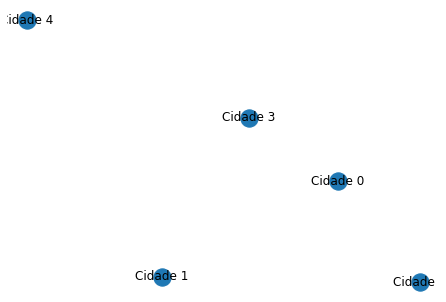

In [8]:
# montando o grafo
import networkx as nx

G = nx.Graph()

for cidade in cidades:    
    x = cidades[cidade][0]
    y = cidades[cidade][1]
    G.add_node(cidade, pos=(x, y))
    
pos = nx.get_node_attributes(G, 'pos')
    
nx.draw(G, pos, with_labels=True)

### Conclusão

Este desafio passado para resolução, foi proposto com o intuito de utilizar dos aprendizados das aulas para resolver um problema presente na lista de experimentos, presente nesta mesma pasta. Da mesma forma que o experimento A.06 foi resolvido na aula anterior, este aqui se utiliza das mesmas ideias, porém com leves modificações que fazem bastante diferença. Os módulos requeridos para o experimento eram: `permutations` de `itertools` e `random`.

Com o objetivo de encontrar o maior caminho a ser percorrido pelo caixeiro, o algoritmo agora deve selecionar apenas os indivíduos que utilizam a maior distância para fazer sua viagem do nosso amigo sem consciência, passando por todas as cidades, conforme suas gerações vão passando. Importante ressaltar que os valores de melhor indivíduo obtido sempre darão valores diferentes a cada vez que o código for rodado, já que cidades e caminhos novos são recriados para cada vez que o algoritmo rodar. As mudanças realizadas no código foram poucas, comparados ao caixeiro com distância mínima, uma vez que bastou inverter os sinais de "menor que" e do `float` infinito, além de mandar o algoritmo buscar o fitness máximo em `max(fitness)`.

Por fim, também foi feita uma análise com relação à busca exaustiva para ver se os valores obtidos eram iguais. 

**OBS:** Antes de modificar o `min(fitness)` para `max(fitness)`, os valores ficavam diferentes.